In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [2]:
sw_df_chars = pd.read_csv("/Users/marce/Desktop/thesis/all_csv/SnowWhite/SnowWhiteCharacters.csv")
sw_df_frames =  pd.read_csv("/Users/marce/Desktop/thesis/all_csv/SnowWhite/SnowWhiteFrames.csv")

sb_df_chars = pd.read_csv("/Users/marce/Desktop/thesis/all_csv/SleepingBeauty/SleepingBeautyCharacters.csv")
sb_df_frames =  pd.read_csv("/Users/marce/Desktop/thesis/all_csv/SleepingBeauty/SleepingBeautyFrames.csv")

al_df_chars = pd.read_csv("/Users/marce/Desktop/thesis/all_csv/Aladdin/AladdinCharacters.csv")
al_df_frames =  pd.read_csv("/Users/marce/Desktop/thesis/all_csv/Aladdin/AladdinFrames.csv")

br_df_chars = pd.read_csv("/Users/marce/Desktop/thesis/all_csv/Brave/BraveCharacters.csv")
br_df_frames =  pd.read_csv("/Users/marce/Desktop/thesis/all_csv/Brave/BraveFrames.csv")

m_color = '#1D81E4'
f_color = '#FF79FB'
sns.set(rc={'axes.facecolor':'#DCE6E6'})
gender_colors = [f_color, m_color]
sns.set_palette(sns.color_palette(gender_colors))

#Legend 
g_colors = {'Male': m_color, 'Female': f_color}         
g_labels = list(g_colors.keys())
g_handles = [plt.Rectangle((0,0),1,1, color = g_colors[label]) for label in g_labels]


1- Join fra chars e frame estraendo le informazioni che ci interessano

2- filtra solo le info che ci interessano

3- aggiungi anno

4- i df risultanti uniscili in uno unico 

In [3]:
# Snow White filtered df --
merged_sw_df = pd.merge(sw_df_frames, sw_df_chars[['ID', 'GENDER', 'ROLE', 'AGENCY']], on='ID')
select_sw_df = merged_sw_df[merged_sw_df['ID'] != -1]
select_sw_df = select_sw_df[['ID', 'EMBODIMENT', 'GENDER', 'ROLE', 'AGENCY']]
sw_year = []
for r in select_sw_df.iterrows():
    sw_year.append(1937)

select_sw_df['YEAR'] = sw_year
#--------------------------

# Sleeping Beauty filtered df --
merged_sb_df = pd.merge(sb_df_frames, sb_df_chars[['ID', 'GENDER', 'ROLE', 'AGENCY']], on='ID')
select_sb_df = merged_sb_df[['ID', 'EMBODIMENT', 'GENDER', 'ROLE', 'AGENCY']]
sb_year = []
for r in select_sb_df.iterrows():
    sb_year.append(1959)

select_sb_df['YEAR'] = sb_year

#-------------------------------

# Aladdin filtered df --
merged_al_df = pd.merge(al_df_frames, al_df_chars[['ID', 'GENDER', 'ROLE', 'AGENCY']], on='ID')
select_al_df = merged_al_df[merged_al_df['ID'] != -1]
select_al_df = select_al_df[['ID', 'EMBODIMENT', 'GENDER', 'ROLE', 'AGENCY']]
al_year = []
for r in select_al_df.iterrows():
    al_year.append(1992)

select_al_df['YEAR'] = al_year
#--------------------------

# Brave filtered df --
merged_br_df = pd.merge(br_df_frames, br_df_chars[['ID', 'GENDER', 'ROLE', 'AGENCY']], on='ID')
select_br_df = merged_br_df[merged_br_df['ID'] != -1]
select_br_df = select_br_df[['ID', 'EMBODIMENT', 'GENDER', 'ROLE', 'AGENCY']]
br_year = []
for r in select_br_df.iterrows():
    br_year.append(2012)

select_br_df['YEAR'] = br_year

#--------------------------

# final df with all 4 Disney Movies
df_total = pd.concat([select_sw_df, select_sb_df, select_al_df, select_br_df])
df_total.head(10000)


ID EMBODIMENT GENDER ROLE AGENCY  YEAR
142    2          3      F    A      3  1937
143    2          3      F    A      3  1937
144    2          3      F    A      3  1937
145    2          3      F    A      3  1937
146    2          3      F    A      3  1937
...   ..        ...    ...  ...    ...   ...
1694  11          3      M  OTH      1  2012
1695  11          3      M  OTH      1  2012
1696  11          3      M  OTH      1  2012
1697  11          3      M  OTH      1  2012
1698  11          3      M  OTH      1  2012

[6176 rows x 6 columns]

## Agency over the years and gender
1 violin plot con hue = gender x = anni y= agency inner="stick" orizzontale

il df che ci serve avrá le colonne Agency, gender , anno film

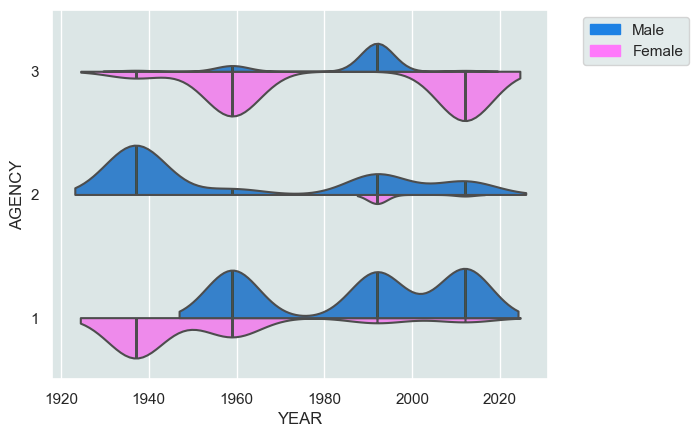

In [4]:
ax = sns.violinplot(data = df_total.astype({'AGENCY': 'int32'}), 
               x = 'YEAR', y = 'AGENCY', hue = 'GENDER', 
               inner = 'stick', scale = 'count', orient = 'h', split = True,
                   scale_hue = True)
ax.invert_yaxis()
plt.legend(g_handles, g_labels, bbox_to_anchor=(1.3, 1))
plt.show()

## Embodiment over the years and gender
1 violin plot con hue = gender x = anni y= embodiment inner="stick" orizzontale

il df che ci serve avrá le colonne Agency, embodiment , anno film

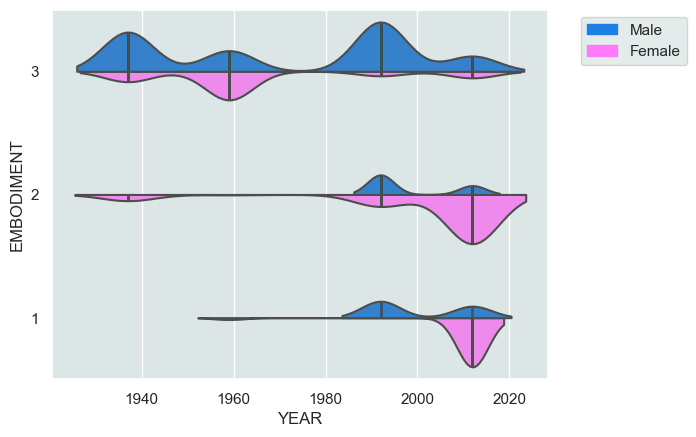

In [5]:
ax = sns.violinplot(data = df_total.astype({'EMBODIMENT': 'int32'}), 
               x = 'YEAR', y = 'EMBODIMENT', hue = 'GENDER', 
               inner = 'stick', scale = 'count', orient = 'h', split = True, 
                   scale_hue = True)
ax.invert_yaxis()
plt.legend(g_handles, g_labels, bbox_to_anchor=(1.05, 1))
plt.show()

## Role over the years and gender
5 violin plot con hue = gender x = anni y= numerositá inner="stick" orizzontale

qui 5 df df che ci serve avrá le colonne Agency, role , anno film


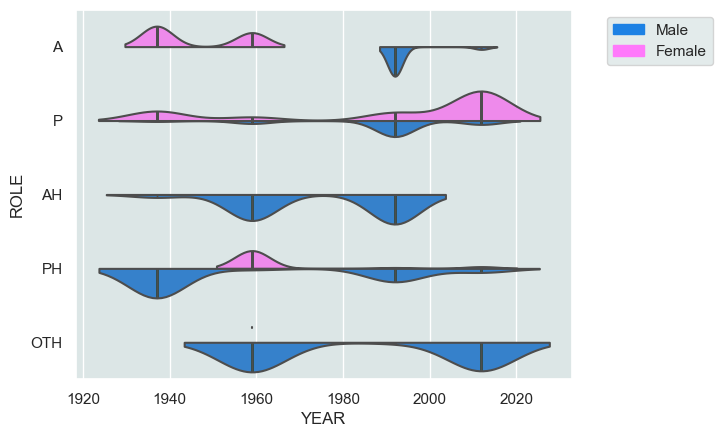

In [6]:

ax = sns.violinplot(data = df_total, 
               x = 'YEAR', y = 'ROLE', hue = 'GENDER', 
               inner = 'stick', scale = 'count', orient = 'h', split = True, 
                   scale_hue = True)
plt.legend(g_handles, g_labels, bbox_to_anchor=(1.3, 1))
plt.show()